<a href="https://colab.research.google.com/github/viriditass/Papers/blob/main/GeoNet_Unsupervised_Learning_of_Dense_Depth%2C_Optical_Flow_and_Camera_Pose.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GeoNet: Unsupervised Learning of Dense Depth, Optical Flow and Camera Pose**

논문 링크: https://openaccess.thecvf.com/content_cvpr_2018/papers/Yin_GeoNet_Unsupervised_Learning_CVPR_2018_paper.pdf

본 논문은 영상으로부터 monocular depth와 optical flow, egomotion estimation을 위한 unsupervised learning framework인 GeoNet을 제안한다.

각 요소에 대해 먼저 간단히 알아보겠다.

depth란, image에 등장하는 각 pixel이 camera로부터 몇 m나 떨어져 있는지를 나타내는 map이다. 보통 stereo camera를 통해 보통 depth를 측정한다.

optical flow는 영상에 연속된 두 frame이 있을때 각 pixel의 motion을 나타내는 vector map이다.

camera pose(camera motion 혹은 ego-motion)는 카메라 한 대가 시간에 따라 포즈를 바꿨을 때 이 둘 사이에서 카메라가 어떤 방향으로 얼마나 움직였는지에 대한 transform이다.

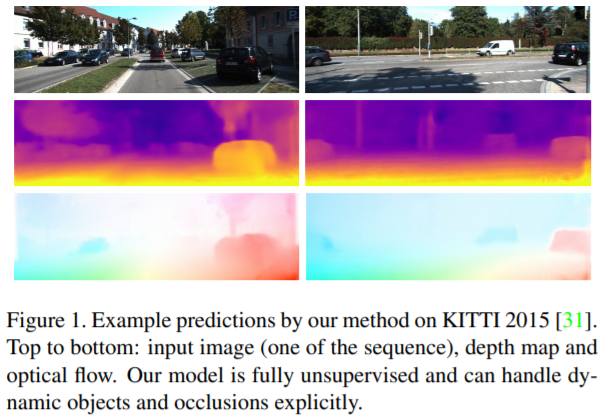

위의 그림 Figure 1은 KITTI 2015 dataset에 대한 본 논문의 결과물이다.

## **GeoNet 구조**

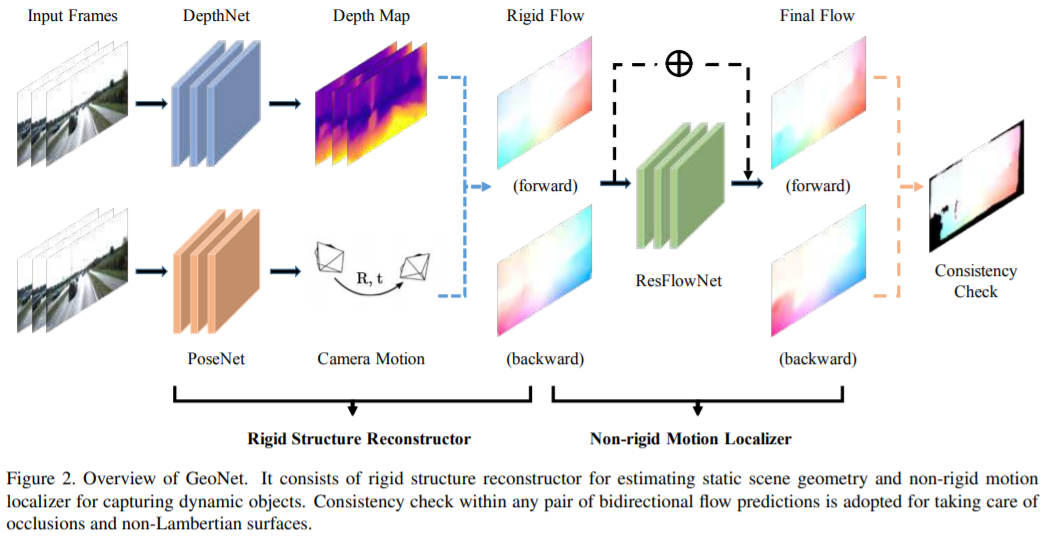

GeoNet의 핵심은 **Rigid motion** 파트와 **Residual motion** 파트로 이루어진 것이다. Rigid motion 파트에서는 camera motion에 의한 상대적인 motion이다. Rsidual motion은 각 object가 스스로 움직여서 발생하는 motion이다.

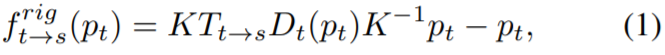

t는 target image, s는 source image이다. 간단히 t에서 s로 흘러가는 flow를 구한다고 생각하면 된다. 어떤 측정 p_t에 대해서 image codinate p_t에 대해서 K^-1 곱하면 normalized codinate가 된다. 그리고 이 상태에서 depth를 곱하면 word codinate가 되고, 또 target에서 source로 가는 3d transpomation T_(t->s)를 곱하게 되면 source image 기준으로 3차원 대상을 좌표로 나타낸 값을 구할 수 있다. 또 이상태에서 K를 곱하면 source image 기준의 위치를 구할 수 있다.

그리고 이 rigid flow와 input frame을 통해 residual flow를 진행한다. 이 둘을 residual sum을 하기 때문에 residual flow라고 명칭을 정했다.

### **Loss function**

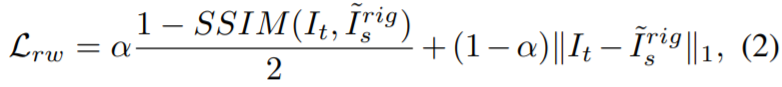

위의 식은 **rigid warping loss**이다. 위 식에서 I_s는 source image를 어떤 t에서 s 방향으로 향하는 flow를 가지고 I_t 시점으로 warping을 한 것이다. 참고로 본 논문에서 α 값은 0.85로 설정했다.

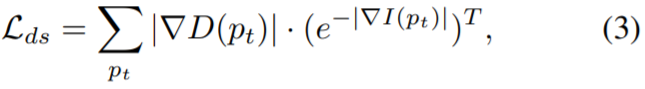

위의 식은 **edge-aware depth smoothness loss**이다. 다른 논문에선 total variable loss라고 많이 언급한다. 이 식은 근처에 있는 pixel들은 값이 비슷하므로 x값이 급격하게 변하지 않게끔 만들어주는 loss이다. 물론 edge 부분은 이 사항에 포함이 되지 않으므로 위의 식과 같이 곱하기를 해준다.

그리고 위 두 식에서 ~I^rig_s 부분을 ~I^full_s로 바꾸면 각각 flow warping loss와 edge-aware flow smoothness loss가 된다.

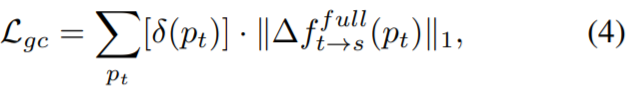

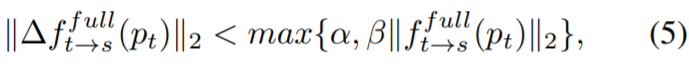

마지막으로 위의 식(4)과 같은 **geometric consistency loss**를 추가하였는데, 이 loss는 occlusion reasoning 목적으로 많이 사용이 된다. 이 loss는 개념적으로 f^full_(t->s) + f^full_(s->t) x (p_t + f^full_(t->s)(p_t))가 0이 나와야 함으로 이 값을 점차 줄여가는 loss인 것이다.

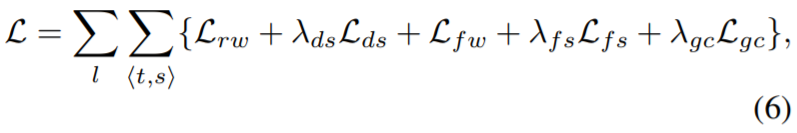

따라서 최종적인 loss function은 위와 같이 된다.

## **Experiments**

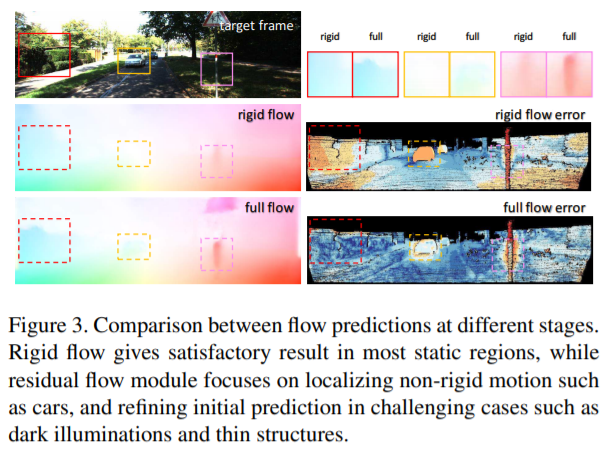

위의 그림 Figure 3은 여러 단계에 대한 flow 예측 결과를 보여준다. rigid flow는 대부분의 정적 영역(static region)에 대해 만족스러운 결과를 제공하며, residual flow의 경우는 자동차와 같은 보다 non-rigid한 motion을 중심적으로 보는 것을 알 수 있다.

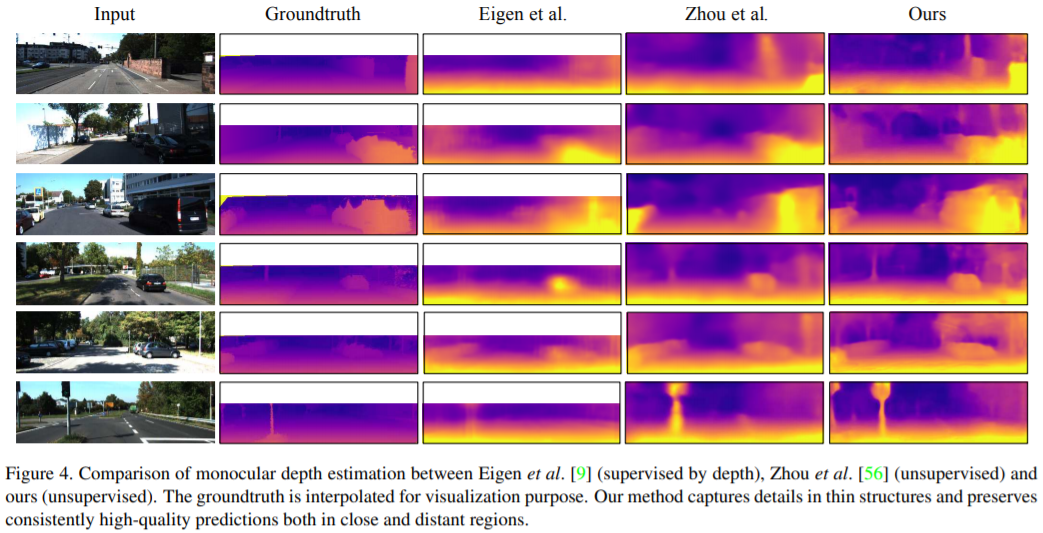

위의 그림 Figure 4는 타 model들과 성능을 비교한 것이다. GeoNet은 얇은 구조의 세부 사항을 캡처하고 가까운 지역과 먼 지역 모두에서 일관성있게 고품질의 예측을 진행하는 것을 알 수 있다.

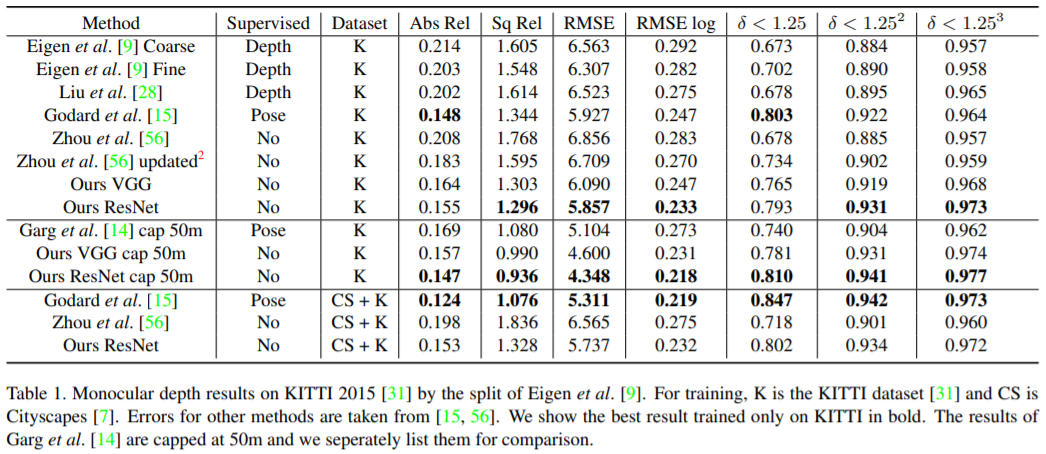

위의 표 Table 1을 보면, 본 논문의 model이 엄첨난 성능을 보여주진 못한다. 하지만, unsupervised라는 강점을 비추어 생각해보면 꽤나 괜찮은 성능을 보여준다는 것을 알 수 있다.

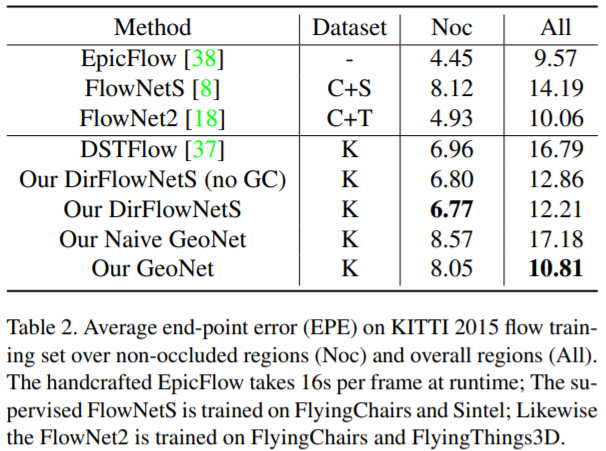

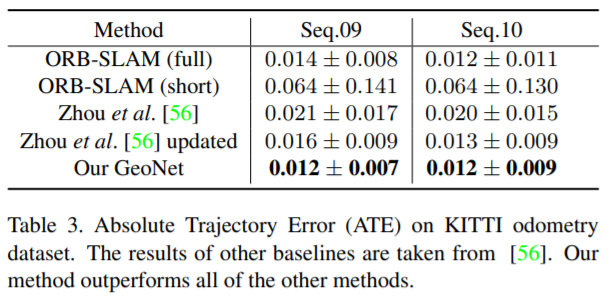

위의 표들 Table 2와 Table 3은 각각 Flow와 Pose에 대한 결과를 보여주는데, 둘다 unsupervised task에 대해 성능이 괜찮다는 것을 알 수 있다.

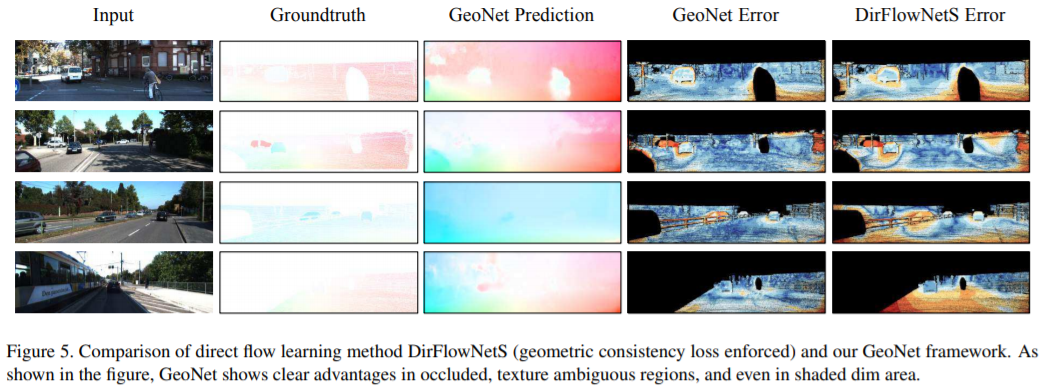

위의 그림 Figure 5는 direct flow learning method인 DirFlowNetS와 GeoNet의 성능을 비교한 것이다. 그림에서 볼 수 있듯이 GeoNet은 가려진 texture나 모호한 영역(ambiguous region), 음영이 있는 어두욱 영역에서도 분명한 강점이 있는 것을 알 수 있다.